In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as sp
import datetime as dt

status_df = pd.read_csv('user_logs/user_status.csv')
status_df['status'] = status_df['status'] == 'repaid'
call_df = pd.read_csv('user_calls.csv')
call_df = call_df.merge(status_df,on="user_id")
call_df['datetime'] = [dt.datetime.fromtimestamp(date_time / 1e3) for date_time in call_df['datetime']]
call_df['hour'] = [date_time.hour for date_time in call_df['datetime']]

# calculate call count, average duration
group_df = call_df.groupby(by=['user_id'])['duration'].agg({'count': len, 'avg_duration': np.mean}) #'total': np.sum
group_df = pd.DataFrame(group_df)
group_df.insert(0, 'user_id', group_df.index)
group_df = group_df.merge(status_df, on=['user_id'])
group_df.head()

,user_id,count,avg_duration,disbursement_date,status
0,1,182,30.351648,2017-05-29T00:00:00.000Z,False
1,2,1423,63.882642,2017-05-30T00:00:00.000Z,True
2,3,442,25.228507,2017-05-26T00:00:00.000Z,False
3,4,1775,68.736901,2017-05-31T00:00:00.000Z,True
4,5,2356,33.780136,2017-05-30T00:00:00.000Z,True


In [3]:
# clear positive association between number of calls and loan status
print sp.pearsonr(group_df['count'], group_df['status'])

# much weaker association with average duration; tried total duration but found no added insights
print sp.pearsonr(group_df['avg_duration'], group_df['status'])

(0.49147750318399142, 1.028787562126901e-25)
(0.16426526977387562, 0.00097566977993749336)


In [24]:
# group_df['count'].describe()

In [5]:
sub1 = group_df[group_df['count'] >= 1000]
sub2 = group_df[group_df['count'] < 1000]
sub3 = group_df[group_df['count'] >= 1500]
sub4 = group_df[group_df['count'] < 500]

print 'reimbursement rate (>=1000 calls):',sum(sub1['status'])/float(len(sub1))
print 'reimbursement rate (<1000 calls): ',sum(sub2['status'])/float(len(sub2))
print 'reimbursement rate (>=1500 calls):',sum(sub3['status'])/float(len(sub3))
print 'reimbursement rate (<500 calls):  ',sum(sub4['status'])/float(len(sub4))

reimbursement rate (>=1000 calls): 0.740196078431
reimbursement rate (<1000 calls):  0.25
reimbursement rate (>=1500 calls): 0.845070422535
reimbursement rate (<500 calls):   0.229885057471


In [7]:
# visualize distribution of calls across hours 0-23 among each subpopulation
good_df = call_df[call_df['status']]
bad_df = call_df[~call_df['status']]

good_df = good_df.pivot_table(index='hour', 
                     columns='user_id', 
                     values='call_type',
                     fill_value=0, 
                     aggfunc='count').unstack().to_frame().rename(columns={0:'call_count'}).reset_index()

call_counts = good_df.groupby(by=['user_id'])['call_count'].sum()
good_df['call_count'] = [float(row['call_count'])/call_counts[row['user_id']] for i, row in good_df.iterrows()]
good_df = good_df.groupby(by='hour')['call_count'].mean()

bad_df = bad_df.pivot_table(index='hour', 
                     columns='user_id', 
                     values='call_type',
                     fill_value=0, 
                     aggfunc='count').unstack().to_frame().rename(columns={0:'call_count'}).reset_index()

call_counts = bad_df.groupby(by=['user_id'])['call_count'].sum()
bad_df['call_count'] = [float(row['call_count'])/call_counts[row['user_id']] for i, row in bad_df.iterrows()]
bad_df = bad_df.groupby(by='hour')['call_count'].mean()

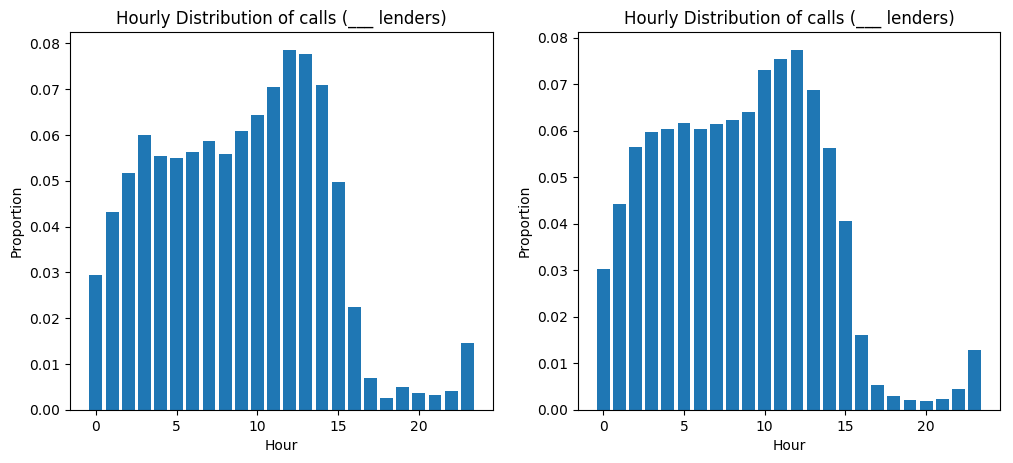

In [23]:
# look at distribution of call times between the two separate populations
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.bar(np.arange(len(bad_df)),bad_df)
plt.xlabel('Hour')
plt.ylabel('Proportion')
plt.title('Hourly Distribution of calls (___ lenders)')
plt.subplot(1,2,2)
plt.bar(np.arange(len(good_df)),good_df)
plt.xlabel('Hour')
plt.ylabel('Proportion')
plt.title('Hourly Distribution of calls (___ lenders)')

plt.show()

In [17]:
# explore sms_df
sms_df = pd.read_csv('user_sms.csv')

# calculate call count, average duration
group_df = sms_df.groupby(by=['user_id'])['message_len'].agg({'count': len, 'avg_len': np.mean}) #'total': np.sum
group_df = pd.DataFrame(group_df)
group_df.insert(0, 'user_id', group_df.index)
group_df = group_df.merge(status_df, on=['user_id'])
group_df['status'] = group_df['status'] == 'repaid'

In [19]:
# clear positive association between number of texts and loan status
print sp.pearsonr(group_df['count'], group_df['status'])

# much weaker association with average duration; tried total duration but found no added insights
print sp.pearsonr(group_df['avg_len'], group_df['status'])

(0.19759545799297712, 6.9252600802108686e-05)
(0.18369507876530952, 0.00022085411585638591)


In [20]:
sms_df

,contact_id,datetime,dev_id,item_id,message_body,sms_address,sms_type,thread_id,user_id,message_len
0,0.0,1.49631e+12,1.0,208.0,Nyongeza imefaulu.Umepokea 4.000 MB.Unadaiwa 5...,Safaricom,1.0,30.0,1.0,90
1,0.0,1.49631e+12,1.0,207.0,Vipi?,0723999444,2.0,46.0,1.0,5
2,0.0,1.4963e+12,1.0,206.0,"Tex, nimepata!",+254878676145,1.0,45.0,1.0,14
3,0.0,1.4963e+12,1.0,205.0,LF185814RI confirmed.You bought Ksh50.00 of ai...,MPESA,1.0,31.0,1.0,143
4,0.0,1.4963e+12,1.0,204.0,10.00 KSH zimeondelewa kulipia Okoa Jahazi.Den...,Safaricom,1.0,30.0,1.0,131
5,0.0,1.4963e+12,1.0,203.0,"Nyongeza imefaulu.Baki 10.05 KSH,matumizi hadi...",Safaricom,1.0,30.0,1.0,71
6,0.0,1.49624e+12,1.0,202.0,"Dear customer,your Data Bundle is almost finis...",Safaricom,1.0,30.0,1.0,95
7,0.0,1.49624e+12,1.0,201.0,10.00 KSH zimeondelewa kulipia Okoa Jahazi.Ung...,Safaricom,1.0,30.0,1.0,120
8,0.0,1.49624e+12,1.0,200.0,LEV14YZ3W3 confirmed.You bought Ksh10.00 of ai...,MPESA,1.0,31.0,1.0,133
9,0.0,1.49623e+12,1.0,199.0,"Umepokea 27.00 KSH STORO Bonus Airtime,matumiz...",Safaricom,1.0,30.0,1.0,64


In [22]:
sms_df['message_body'][2066689]

'Hey Cynthia hw is family.anyway were u able to  get'

In [ ]:
# consider loan status across users by number of devices (1-3)

In [27]:
# calculate call count, average duration
group_df = call_df.groupby(by=['user_id'])['device_count'].agg({'device_count': np.mean})
group_df = pd.DataFrame(group_df)
group_df.insert(0, 'user_id', group_df.index)
group_df = group_df.merge(status_df, on=['user_id'])

In [30]:
sub1 = group_df[group_df['device_count'] == 1]
sub2 = group_df[group_df['device_count'] == 2]
sub3 = group_df[group_df['device_count'] >= 3]

print 'reimbursement rate (1 device):', sum(sub1['status'])/float(len(sub1))
print 'reimbursement rate (2 devices): ', sum(sub2['status'])/float(len(sub2))
print 'reimbursement rate (3+ devices): ', sum(sub3['status'])/float(len(sub3))

reimbursement rate (1 device): 0.474474474474
reimbursement rate (2 devices):  0.583333333333
reimbursement rate (3+ devices):  0.736842105263


TypeError: text() takes at least 3 arguments (1 given)

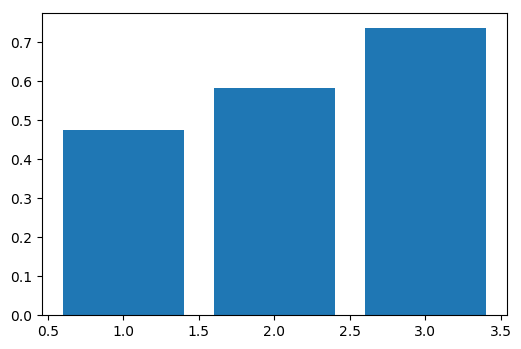

In [46]:
# make a bar graph with listed counts for each number
levels = [sum(sub['status'])/float(len(sub)) for sub in [sub1, sub2, sub3]]
plt.bar(np.arange(len(levels))+1,levels)
plt.text(['1','2','3'])
plt.xlabel('# of devices')
plt.ylabel('loan conversion rate')
plt.show()

In [43]:
levels

[0.47447447447447449, 0.58333333333333337, 0.73684210526315785]